In [ ]:
#IMPORTS
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [6]:
#GLOBAL VARIABLES
OMEGA_0 = 30.0
HIDDEN_SIZE = 128 
N_HIDDEN_LAYERS = 3  
IMAGE_CHANNELS = 1
Z_DIM = 64
BATCH_SIZE = 64  
LEARNING_RATE = 1e-3  
EPOCHS = 25
NUM_BANDS = 8  
IMG_SIZE = 28 
NUM_WORKERS = 4  

In [ ]:
#FASTER TRAINING
try:
    if hasattr(torch, 'backends') and hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
        NUM_WORKERS = 1  
except:
    pass

In [5]:
def positional_encoding(coords, num_bands=NUM_BANDS):
    """Apply positional encoding to the input coordinates."""
    pos_enc = [coords]
    for i in range(num_bands):
        freq = 2.0 ** i
        pos_enc.append(torch.sin(coords * freq * np.pi))
        pos_enc.append(torch.cos(coords * freq * np.pi))
    return torch.cat(pos_enc, dim=-1)

def get_mgrid(sidelen, dim=2, num_bands=NUM_BANDS):
    """Get a meshgrid of coordinates with positional encoding."""
    if isinstance(sidelen, int):
        sidelen = dim * (sidelen,)
    coords = [torch.linspace(-1, 1, s) for s in sidelen]
    mesh_coords = torch.meshgrid(*coords, indexing='ij')  
    coords = torch.stack(mesh_coords, dim=-1).reshape(-1, dim)
    return positional_encoding(coords, num_bands)


Using device: mps
Train Epoch: 1 [0/18000 (0%)]	Loss: 156.487137
Train Epoch: 1 [3200/18000 (18%)]	Loss: 39.848885
Train Epoch: 1 [6400/18000 (35%)]	Loss: 27.423059
Train Epoch: 1 [9600/18000 (53%)]	Loss: 23.382004
Train Epoch: 1 [12800/18000 (71%)]	Loss: 21.962328
Train Epoch: 1 [16000/18000 (89%)]	Loss: 22.379063
====> Epoch: 1 Average loss: 31.840012 (Recon: 31.720765, KL: 119.246254)
====> Test set loss: 21.713651 (Recon: 21.560949, KL: 152.702302)


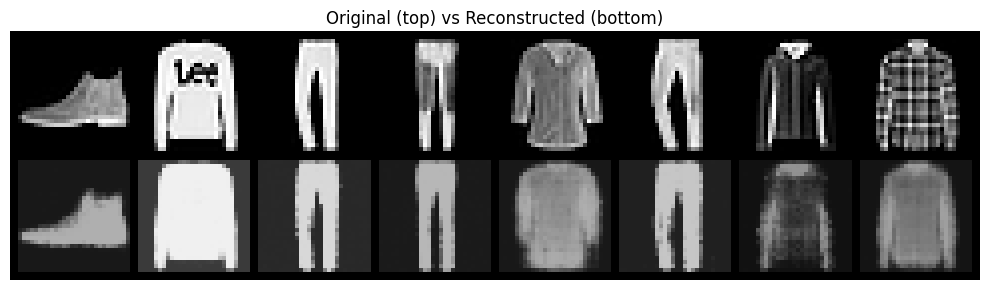

Train Epoch: 2 [0/18000 (0%)]	Loss: 19.597363
Train Epoch: 2 [3200/18000 (18%)]	Loss: 20.419800
Train Epoch: 2 [6400/18000 (35%)]	Loss: 22.566793
Train Epoch: 2 [9600/18000 (53%)]	Loss: 20.396315
Train Epoch: 2 [12800/18000 (71%)]	Loss: 18.916086
Train Epoch: 2 [16000/18000 (89%)]	Loss: 17.584518
====> Epoch: 2 Average loss: 19.216728 (Recon: 19.066614, KL: 150.114276)
====> Test set loss: 18.208802 (Recon: 18.063101, KL: 145.701417)


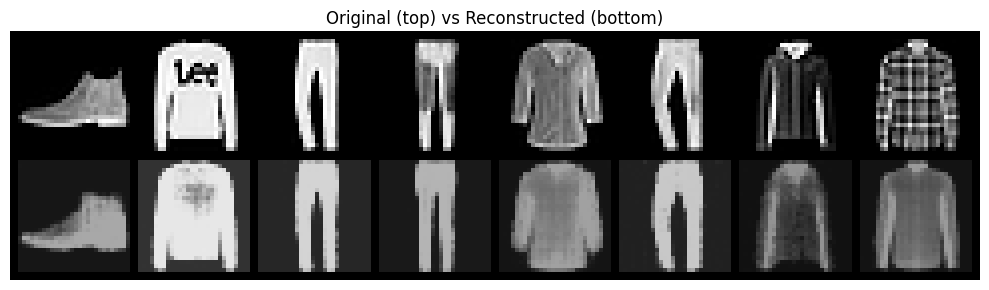

Train Epoch: 3 [0/18000 (0%)]	Loss: 17.544409
Train Epoch: 3 [3200/18000 (18%)]	Loss: 18.813328
Train Epoch: 3 [6400/18000 (35%)]	Loss: 17.139812
Train Epoch: 3 [9600/18000 (53%)]	Loss: 15.985477
Train Epoch: 3 [12800/18000 (71%)]	Loss: 13.823037
Train Epoch: 3 [16000/18000 (89%)]	Loss: 16.140621
====> Epoch: 3 Average loss: 17.194475 (Recon: 17.045685, KL: 148.789971)
====> Test set loss: 17.204842 (Recon: 17.057072, KL: 147.769521)


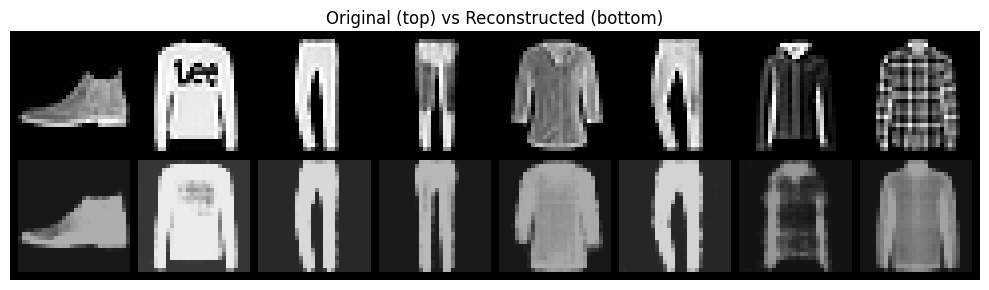

Train Epoch: 4 [0/18000 (0%)]	Loss: 17.365828
Train Epoch: 4 [3200/18000 (18%)]	Loss: 15.558120
Train Epoch: 4 [6400/18000 (35%)]	Loss: 16.617384
Train Epoch: 4 [9600/18000 (53%)]	Loss: 17.368397
Train Epoch: 4 [12800/18000 (71%)]	Loss: 17.033813
Train Epoch: 4 [16000/18000 (89%)]	Loss: 16.863358
====> Epoch: 4 Average loss: 16.155532 (Recon: 16.006800, KL: 148.732648)
====> Test set loss: 16.192357 (Recon: 16.044092, KL: 148.265933)


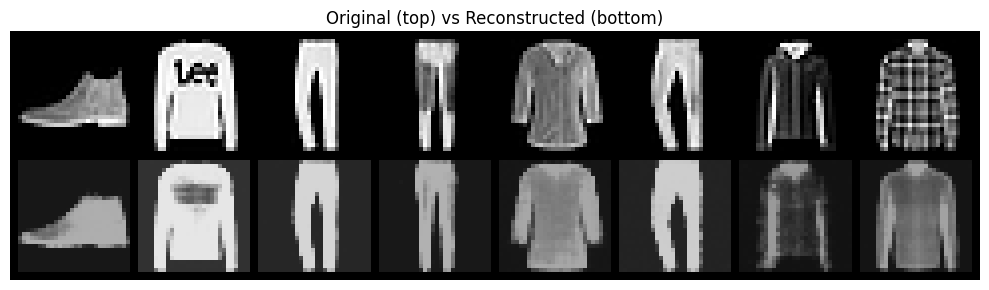

Train Epoch: 5 [0/18000 (0%)]	Loss: 17.509596
Train Epoch: 5 [3200/18000 (18%)]	Loss: 16.311958
Train Epoch: 5 [6400/18000 (35%)]	Loss: 17.545483
Train Epoch: 5 [9600/18000 (53%)]	Loss: 15.154134
Train Epoch: 5 [12800/18000 (71%)]	Loss: 15.277879
Train Epoch: 5 [16000/18000 (89%)]	Loss: 15.026395
====> Epoch: 5 Average loss: 15.451398 (Recon: 15.302227, KL: 149.170728)
====> Test set loss: 15.751523 (Recon: 15.600347, KL: 151.176518)


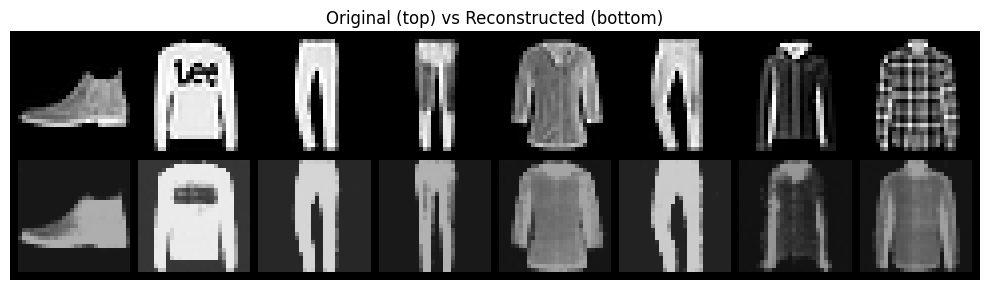

Train Epoch: 6 [0/18000 (0%)]	Loss: 14.913374
Train Epoch: 6 [3200/18000 (18%)]	Loss: 15.765823
Train Epoch: 6 [6400/18000 (35%)]	Loss: 14.365129
Train Epoch: 6 [9600/18000 (53%)]	Loss: 15.150881
Train Epoch: 6 [12800/18000 (71%)]	Loss: 16.066113
Train Epoch: 6 [16000/18000 (89%)]	Loss: 15.030604
====> Epoch: 6 Average loss: 15.003891 (Recon: 14.854628, KL: 149.263250)
====> Test set loss: 15.312231 (Recon: 15.162266, KL: 149.965080)


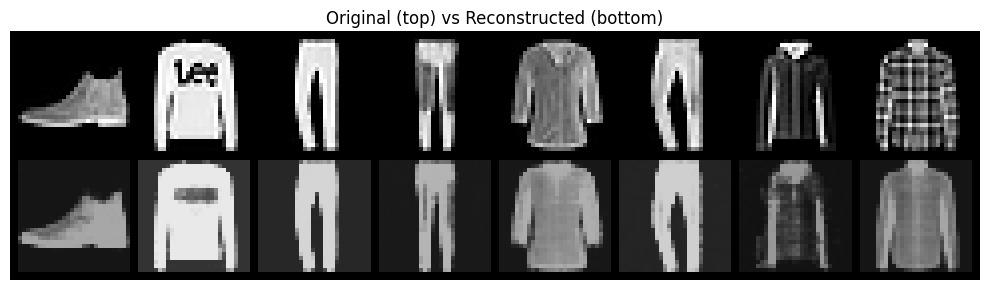

Train Epoch: 7 [0/18000 (0%)]	Loss: 14.948569
Train Epoch: 7 [3200/18000 (18%)]	Loss: 14.454902
Train Epoch: 7 [6400/18000 (35%)]	Loss: 16.064423
Train Epoch: 7 [9600/18000 (53%)]	Loss: 16.135954
Train Epoch: 7 [12800/18000 (71%)]	Loss: 15.143925
Train Epoch: 7 [16000/18000 (89%)]	Loss: 14.391719
====> Epoch: 7 Average loss: 14.577963 (Recon: 14.427058, KL: 150.904708)
====> Test set loss: 15.168474 (Recon: 15.018081, KL: 150.393561)


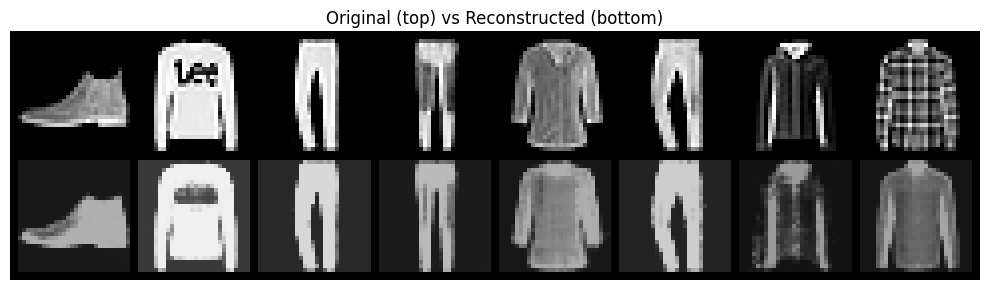

Train Epoch: 8 [0/18000 (0%)]	Loss: 14.773707
Train Epoch: 8 [3200/18000 (18%)]	Loss: 15.321623
Train Epoch: 8 [6400/18000 (35%)]	Loss: 13.640329
Train Epoch: 8 [9600/18000 (53%)]	Loss: 13.519523
Train Epoch: 8 [12800/18000 (71%)]	Loss: 12.621767
Train Epoch: 8 [16000/18000 (89%)]	Loss: 14.711035
====> Epoch: 8 Average loss: 14.303126 (Recon: 14.152139, KL: 150.987142)
====> Test set loss: 15.186484 (Recon: 15.038973, KL: 147.511062)


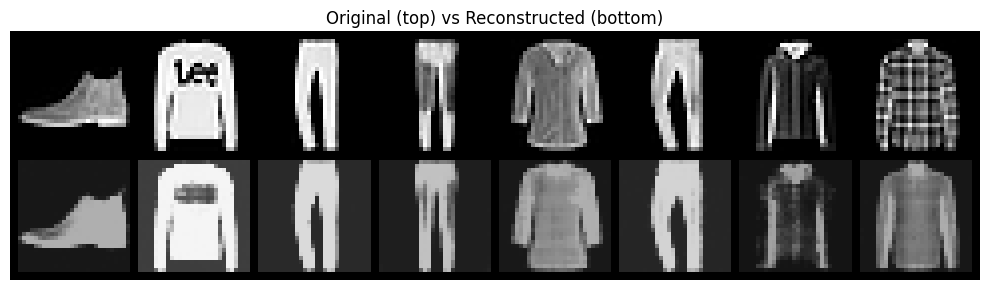

Train Epoch: 9 [0/18000 (0%)]	Loss: 14.265389
Train Epoch: 9 [3200/18000 (18%)]	Loss: 13.011932
Train Epoch: 9 [6400/18000 (35%)]	Loss: 12.949213
Train Epoch: 9 [9600/18000 (53%)]	Loss: 14.385459
Train Epoch: 9 [12800/18000 (71%)]	Loss: 14.544366
Train Epoch: 9 [16000/18000 (89%)]	Loss: 14.497764
====> Epoch: 9 Average loss: 14.027024 (Recon: 13.875267, KL: 151.757424)
====> Test set loss: 14.974035 (Recon: 14.825388, KL: 148.647051)


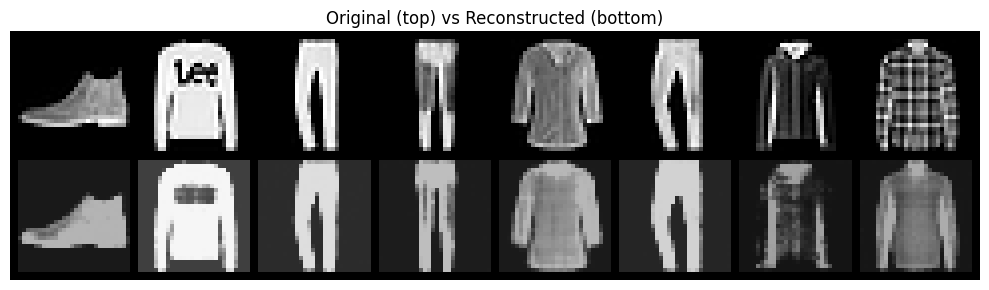

Train Epoch: 10 [0/18000 (0%)]	Loss: 12.827572
Train Epoch: 10 [3200/18000 (18%)]	Loss: 13.520143
Train Epoch: 10 [6400/18000 (35%)]	Loss: 14.823809
Train Epoch: 10 [9600/18000 (53%)]	Loss: 14.801602
Train Epoch: 10 [12800/18000 (71%)]	Loss: 14.172417
Train Epoch: 10 [16000/18000 (89%)]	Loss: 13.457128
====> Epoch: 10 Average loss: 13.849915 (Recon: 13.698394, KL: 151.520965)
====> Test set loss: 14.694935 (Recon: 14.544216, KL: 150.718744)


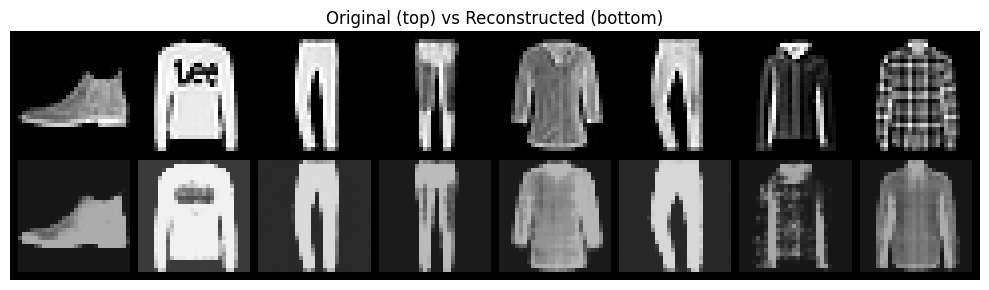

Train Epoch: 11 [0/18000 (0%)]	Loss: 12.019827
Train Epoch: 11 [3200/18000 (18%)]	Loss: 13.675005
Train Epoch: 11 [6400/18000 (35%)]	Loss: 12.742769
Train Epoch: 11 [9600/18000 (53%)]	Loss: 13.161642
Train Epoch: 11 [12800/18000 (71%)]	Loss: 14.653663
Train Epoch: 11 [16000/18000 (89%)]	Loss: 13.875977
====> Epoch: 11 Average loss: 13.642446 (Recon: 13.490236, KL: 152.209871)
====> Test set loss: 14.627371 (Recon: 14.480100, KL: 147.271650)


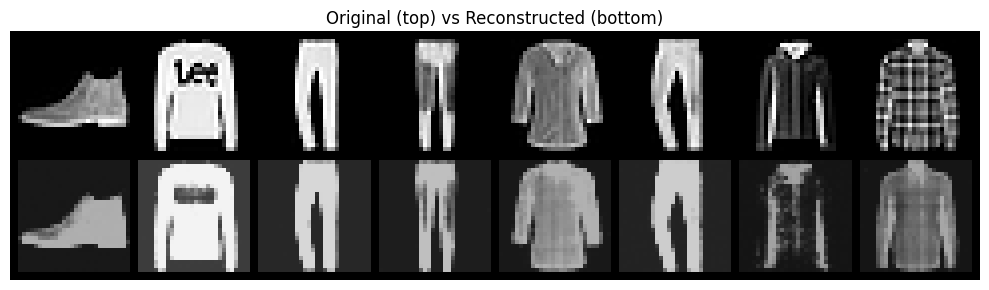

Train Epoch: 12 [0/18000 (0%)]	Loss: 12.716827
Train Epoch: 12 [3200/18000 (18%)]	Loss: 13.220473
Train Epoch: 12 [6400/18000 (35%)]	Loss: 14.740859
Train Epoch: 12 [9600/18000 (53%)]	Loss: 13.547050
Train Epoch: 12 [12800/18000 (71%)]	Loss: 13.434545
Train Epoch: 12 [16000/18000 (89%)]	Loss: 13.351201
====> Epoch: 12 Average loss: 13.501301 (Recon: 13.349035, KL: 152.266819)
====> Test set loss: 14.701698 (Recon: 14.548522, KL: 153.176625)


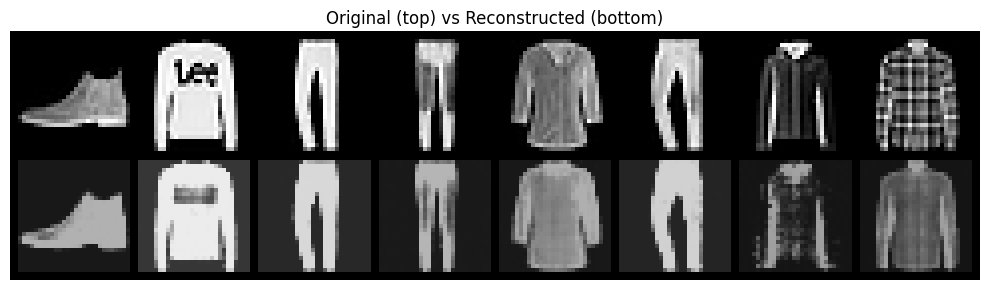

Train Epoch: 13 [0/18000 (0%)]	Loss: 13.052561
Train Epoch: 13 [3200/18000 (18%)]	Loss: 14.758089
Train Epoch: 13 [6400/18000 (35%)]	Loss: 13.152899
Train Epoch: 13 [9600/18000 (53%)]	Loss: 13.238925
Train Epoch: 13 [12800/18000 (71%)]	Loss: 13.166253
Train Epoch: 13 [16000/18000 (89%)]	Loss: 13.088935
====> Epoch: 13 Average loss: 13.396042 (Recon: 13.244099, KL: 151.943578)
====> Test set loss: 14.562523 (Recon: 14.412468, KL: 150.054426)


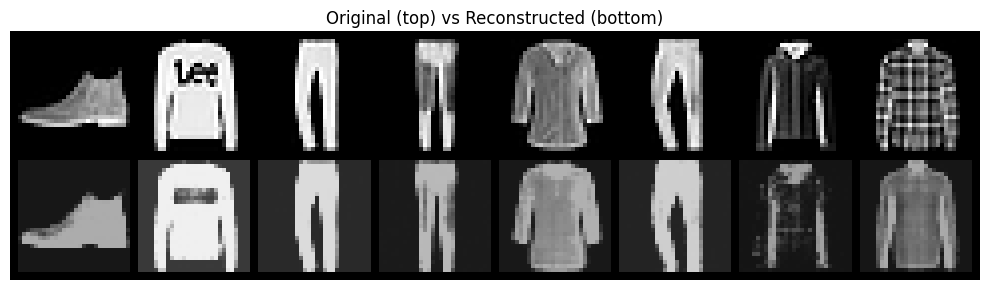

Train Epoch: 14 [0/18000 (0%)]	Loss: 13.083548
Train Epoch: 14 [3200/18000 (18%)]	Loss: 14.126896
Train Epoch: 14 [6400/18000 (35%)]	Loss: 14.023078
Train Epoch: 14 [9600/18000 (53%)]	Loss: 11.891277
Train Epoch: 14 [12800/18000 (71%)]	Loss: 13.522352
Train Epoch: 14 [16000/18000 (89%)]	Loss: 13.148389
====> Epoch: 14 Average loss: 13.176777 (Recon: 13.024498, KL: 152.279219)
====> Test set loss: 14.590200 (Recon: 14.441838, KL: 148.361600)


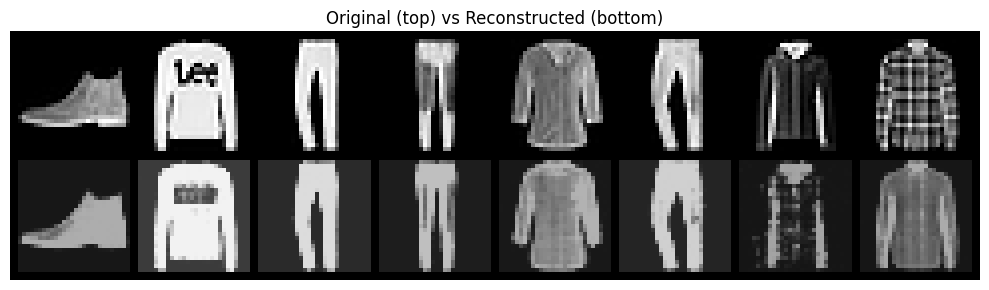

Train Epoch: 15 [0/18000 (0%)]	Loss: 12.752143
Train Epoch: 15 [3200/18000 (18%)]	Loss: 13.317462
Train Epoch: 15 [6400/18000 (35%)]	Loss: 12.924954
Train Epoch: 15 [9600/18000 (53%)]	Loss: 13.253449
Train Epoch: 15 [12800/18000 (71%)]	Loss: 12.539222
Train Epoch: 15 [16000/18000 (89%)]	Loss: 12.802235
====> Epoch: 15 Average loss: 13.077507 (Recon: 12.924915, KL: 152.591977)
====> Test set loss: 14.574964 (Recon: 14.423009, KL: 151.954905)


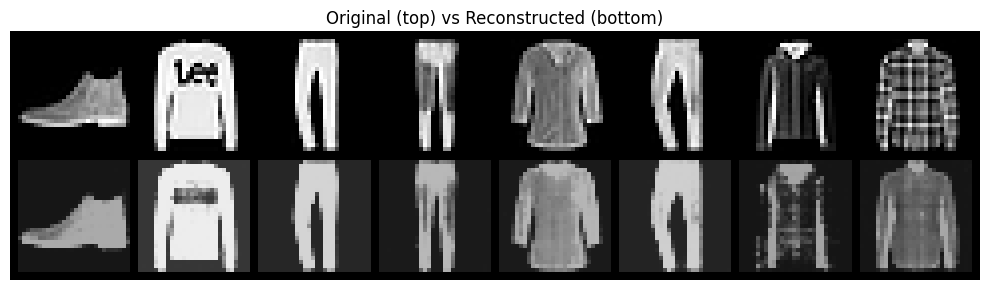

Train Epoch: 16 [0/18000 (0%)]	Loss: 13.211884
Train Epoch: 16 [3200/18000 (18%)]	Loss: 11.946495
Train Epoch: 16 [6400/18000 (35%)]	Loss: 13.412978
Train Epoch: 16 [9600/18000 (53%)]	Loss: 12.821396
Train Epoch: 16 [12800/18000 (71%)]	Loss: 12.932674
Train Epoch: 16 [16000/18000 (89%)]	Loss: 11.325867
====> Epoch: 16 Average loss: 12.412455 (Recon: 12.257212, KL: 155.243324)
====> Test set loss: 14.019308 (Recon: 13.861905, KL: 157.403195)


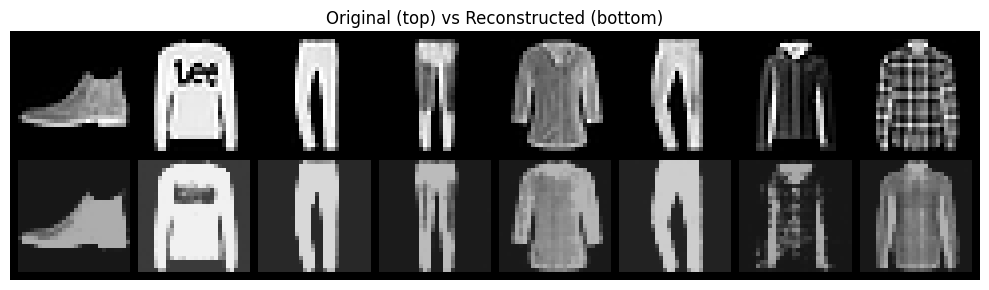

Train Epoch: 17 [0/18000 (0%)]	Loss: 12.490379
Train Epoch: 17 [3200/18000 (18%)]	Loss: 12.043234
Train Epoch: 17 [6400/18000 (35%)]	Loss: 13.039576
Train Epoch: 17 [9600/18000 (53%)]	Loss: 10.796353
Train Epoch: 17 [12800/18000 (71%)]	Loss: 11.995507
Train Epoch: 17 [16000/18000 (89%)]	Loss: 12.997897
====> Epoch: 17 Average loss: 12.116317 (Recon: 11.955130, KL: 161.187638)
====> Test set loss: 13.983353 (Recon: 13.819415, KL: 163.938243)


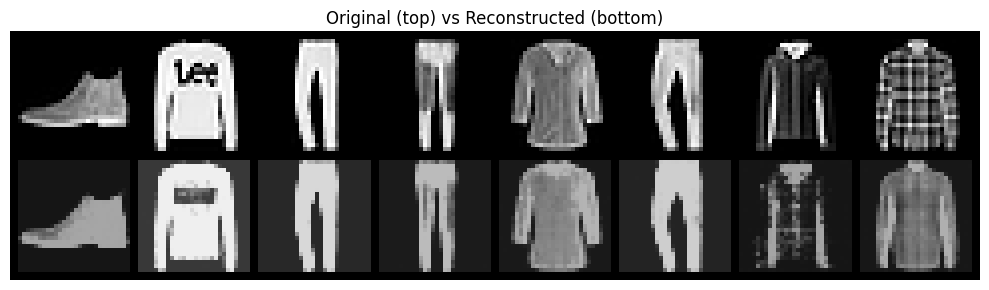

Train Epoch: 18 [0/18000 (0%)]	Loss: 11.298006
Train Epoch: 18 [3200/18000 (18%)]	Loss: 11.051305
Train Epoch: 18 [6400/18000 (35%)]	Loss: 12.342012
Train Epoch: 18 [9600/18000 (53%)]	Loss: 12.116052
Train Epoch: 18 [12800/18000 (71%)]	Loss: 11.430975
Train Epoch: 18 [16000/18000 (89%)]	Loss: 12.282652
====> Epoch: 18 Average loss: 12.002462 (Recon: 11.837315, KL: 165.147599)
====> Test set loss: 14.028751 (Recon: 13.863993, KL: 164.758557)


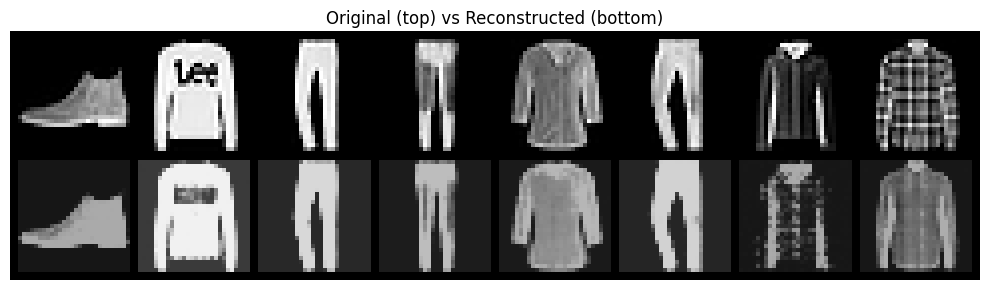

Train Epoch: 19 [0/18000 (0%)]	Loss: 11.516012
Train Epoch: 19 [3200/18000 (18%)]	Loss: 12.205843
Train Epoch: 19 [6400/18000 (35%)]	Loss: 12.705575
Train Epoch: 19 [9600/18000 (53%)]	Loss: 12.007037
Train Epoch: 19 [12800/18000 (71%)]	Loss: 11.280655
Train Epoch: 19 [16000/18000 (89%)]	Loss: 12.025281
====> Epoch: 19 Average loss: 11.923091 (Recon: 11.755364, KL: 167.727024)
====> Test set loss: 14.060231 (Recon: 13.892283, KL: 167.947882)


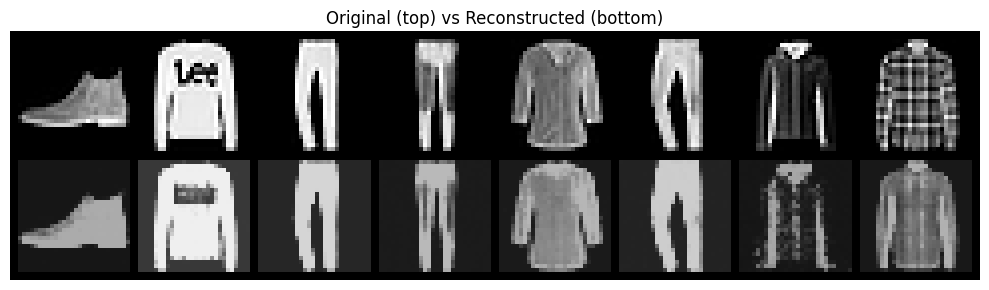

Train Epoch: 20 [0/18000 (0%)]	Loss: 10.978269
Train Epoch: 20 [3200/18000 (18%)]	Loss: 11.245798
Train Epoch: 20 [6400/18000 (35%)]	Loss: 11.243805
Train Epoch: 20 [9600/18000 (53%)]	Loss: 10.822092
Train Epoch: 20 [12800/18000 (71%)]	Loss: 12.237640
Train Epoch: 20 [16000/18000 (89%)]	Loss: 11.535475
====> Epoch: 20 Average loss: 11.663932 (Recon: 11.493351, KL: 170.580855)
====> Test set loss: 13.938766 (Recon: 13.766094, KL: 172.671851)


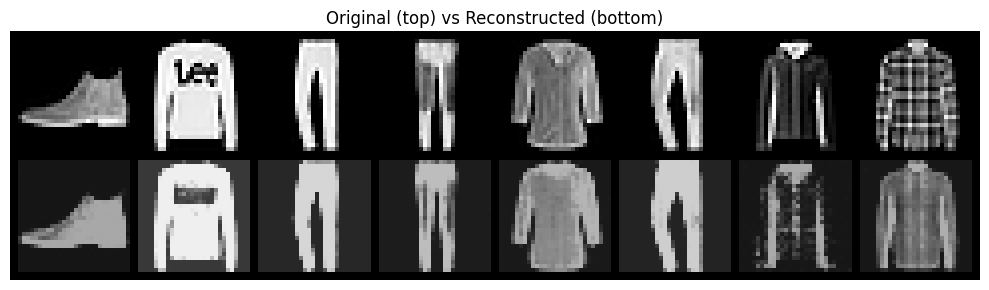

Train Epoch: 21 [0/18000 (0%)]	Loss: 12.158438
Train Epoch: 21 [3200/18000 (18%)]	Loss: 11.069711
Train Epoch: 21 [6400/18000 (35%)]	Loss: 13.417470
Train Epoch: 21 [9600/18000 (53%)]	Loss: 11.582639
Train Epoch: 21 [12800/18000 (71%)]	Loss: 12.473201
Train Epoch: 21 [16000/18000 (89%)]	Loss: 11.695711
====> Epoch: 21 Average loss: 11.538639 (Recon: 11.364952, KL: 173.686744)
====> Test set loss: 13.961065 (Recon: 13.788257, KL: 172.808548)


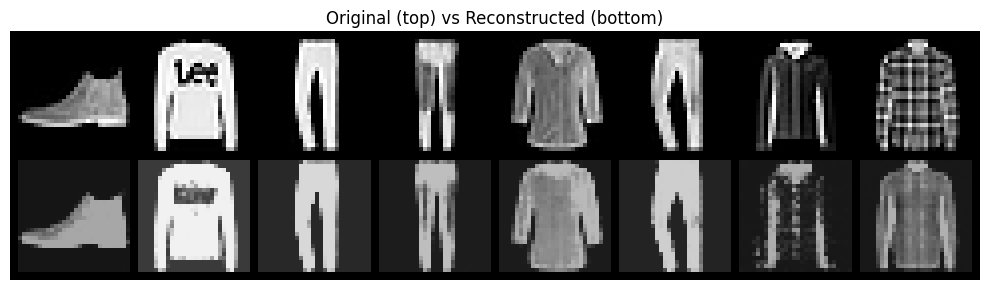

Train Epoch: 22 [0/18000 (0%)]	Loss: 12.815196
Train Epoch: 22 [3200/18000 (18%)]	Loss: 11.259235
Train Epoch: 22 [6400/18000 (35%)]	Loss: 10.727169
Train Epoch: 22 [9600/18000 (53%)]	Loss: 11.815909
Train Epoch: 22 [12800/18000 (71%)]	Loss: 11.309690
Train Epoch: 22 [16000/18000 (89%)]	Loss: 11.992765
====> Epoch: 22 Average loss: 11.470931 (Recon: 11.294976, KL: 175.955412)
====> Test set loss: 13.971988 (Recon: 13.794550, KL: 177.437613)


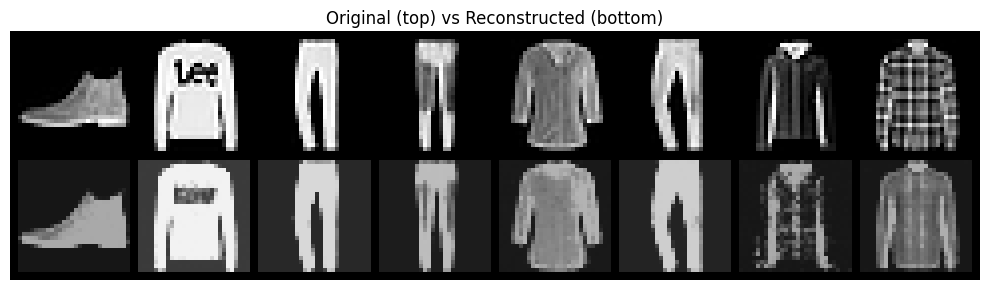

Train Epoch: 23 [0/18000 (0%)]	Loss: 11.451711
Train Epoch: 23 [3200/18000 (18%)]	Loss: 10.728112
Train Epoch: 23 [6400/18000 (35%)]	Loss: 10.933837
Train Epoch: 23 [9600/18000 (53%)]	Loss: 11.427520
Train Epoch: 23 [12800/18000 (71%)]	Loss: 11.219840
Train Epoch: 23 [16000/18000 (89%)]	Loss: 12.987864
====> Epoch: 23 Average loss: 11.339379 (Recon: 11.161107, KL: 178.271797)
====> Test set loss: 13.956046 (Recon: 13.776604, KL: 179.442258)


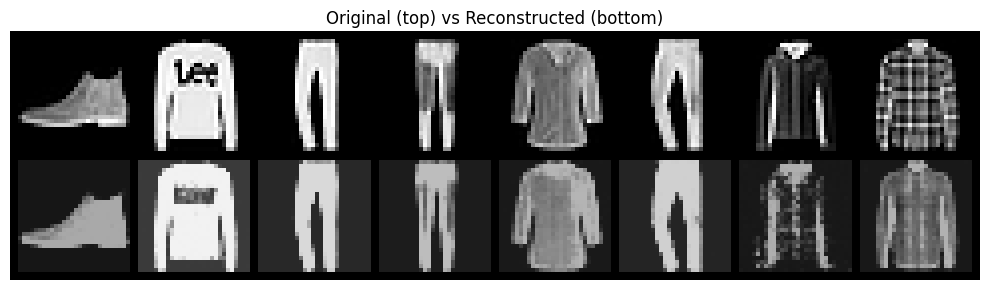

Train Epoch: 24 [0/18000 (0%)]	Loss: 11.180782
Train Epoch: 24 [3200/18000 (18%)]	Loss: 11.047279
Train Epoch: 24 [6400/18000 (35%)]	Loss: 11.200093
Train Epoch: 24 [9600/18000 (53%)]	Loss: 11.937160
Train Epoch: 24 [12800/18000 (71%)]	Loss: 10.354168
Train Epoch: 24 [16000/18000 (89%)]	Loss: 10.067435
====> Epoch: 24 Average loss: 11.283175 (Recon: 11.103053, KL: 180.122674)
====> Test set loss: 13.980011 (Recon: 13.800560, KL: 179.451994)


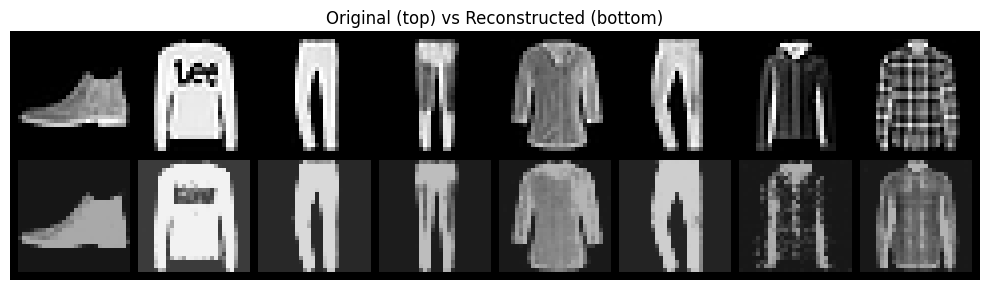

Train Epoch: 25 [0/18000 (0%)]	Loss: 11.481260
Train Epoch: 25 [3200/18000 (18%)]	Loss: 10.258158
Train Epoch: 25 [6400/18000 (35%)]	Loss: 12.172046
Train Epoch: 25 [9600/18000 (53%)]	Loss: 10.935349
Train Epoch: 25 [12800/18000 (71%)]	Loss: 11.452843
Train Epoch: 25 [16000/18000 (89%)]	Loss: 10.748577
====> Epoch: 25 Average loss: 11.210646 (Recon: 11.029104, KL: 181.542003)
====> Test set loss: 13.972993 (Recon: 13.790990, KL: 182.003419)


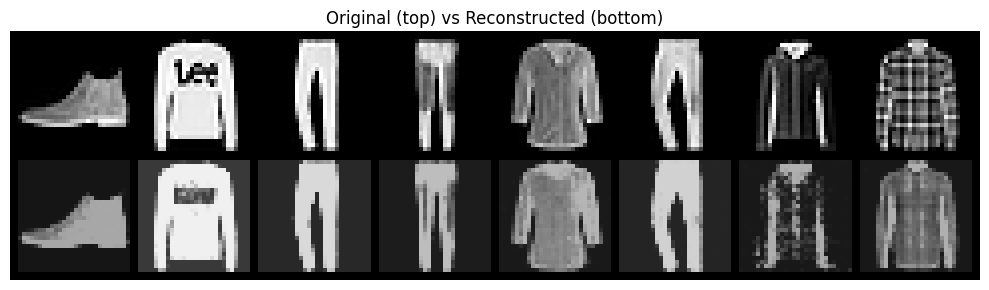

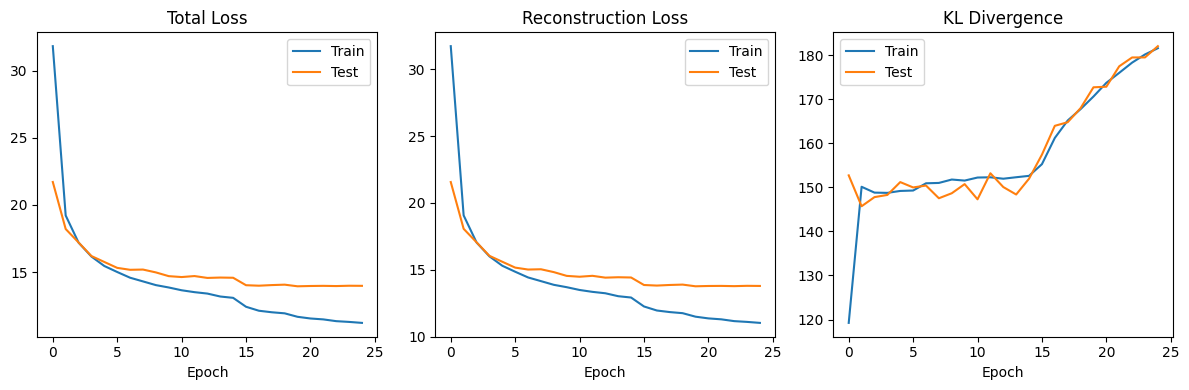

In [ ]:
class SineLayer(nn.Module):
    """Sine activation with omega_0 frequency factor."""
    def __init__(self, in_features, out_features, omega_0=OMEGA_0):
        super().__init__()
        self.omega_0 = omega_0
        self.in_features = in_features
        self.out_features = out_features
    
    def forward(self, input, W, b):
        return torch.sin(self.omega_0 * F.linear(input, W, b))

class SIREN(nn.Module):
    """SIREN network that can use dynamically generated weights."""
    def __init__(self, input_dim=2+2*2*NUM_BANDS, hidden_dim=HIDDEN_SIZE, 
                hidden_layers=N_HIDDEN_LAYERS, output_dim=IMAGE_CHANNELS):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.hidden_layers = hidden_layers
        self.output_dim = output_dim
        
        # Calculate sizes for weight partitioning
        self.weight_sizes = self.calc_weight_sizes()
        self.total_weights = sum(self.weight_sizes)
        
        # Create layers
        self.first_layer = SineLayer(input_dim, hidden_dim, omega_0=30.0)
        self.hidden_layers_list = nn.ModuleList([
            SineLayer(hidden_dim, hidden_dim) for _ in range(hidden_layers)
        ])
    
    def calc_weight_sizes(self):
        """Calculate sizes of each weight tensor for partitioning."""
        sizes = []
        # First layer weights and biases
        sizes.append(self.input_dim * self.hidden_dim)  # W1
        sizes.append(self.hidden_dim)  # b1
        
        # Hidden layers weights and biases
        for _ in range(self.hidden_layers):
            sizes.append(self.hidden_dim * self.hidden_dim)  # W
            sizes.append(self.hidden_dim)  # b
        
        # Output layer weights and biases
        sizes.append(self.hidden_dim * self.output_dim)  # W_out
        sizes.append(self.output_dim)  # b_out
        
        return sizes
    
    @staticmethod
    def calc_total_weights(input_dim, hidden_dim, hidden_layers, output_dim):
        """Calculate total number of weights needed for the network."""
        total = input_dim * hidden_dim + hidden_dim  # First layer
        total += hidden_layers * (hidden_dim * hidden_dim + hidden_dim)  # Hidden layers
        total += hidden_dim * output_dim + output_dim  # Output layer
        return total
    
    def forward(self, coords, weights):
        """Forward pass using dynamically generated weights."""
        # Split weights into layer-specific parts
        weight_parts = []
        start_idx = 0
        for size in self.weight_sizes:
            weight_parts.append(weights[:, start_idx:start_idx+size])
            start_idx += size
        
        # Apply first layer
        idx = 0
        W1 = weight_parts[idx].view(-1, self.hidden_dim, self.input_dim)
        idx += 1
        b1 = weight_parts[idx]
        idx += 1
        
        # Process each example in the batch separately
        batch_size = weights.shape[0]
        outputs = []
        
        for i in range(batch_size):
            x = self.first_layer(coords, W1[i], b1[i])
            
            # Apply hidden layers
            for layer_idx, layer in enumerate(self.hidden_layers_list):
                W = weight_parts[idx + layer_idx*2].view(-1, self.hidden_dim, self.hidden_dim)[i]
                b = weight_parts[idx + layer_idx*2 + 1][i]
                x = layer(x, W, b)
            
            # Apply final layer
            final_idx = idx + len(self.hidden_layers_list) * 2
            W_final = weight_parts[final_idx].view(-1, self.output_dim, self.hidden_dim)[i]
            b_final = weight_parts[final_idx + 1][i]
            x = F.linear(x, W_final, b_final)

            x = torch.sigmoid(x * 1.5) 
            
            outputs.append(x)
        
        # Stack all batch outputs
        return torch.stack(outputs)

class VAE(nn.Module):
    def __init__(self, z_dim=Z_DIM, siren_config=None):
        super().__init__()
        self.z_dim = z_dim
        
        # Default SIREN config
        self.siren_config = {
            'input_dim': 2 + 2*2*NUM_BANDS,  # 2D coords + positional encoding
            'hidden_dim': HIDDEN_SIZE,       
            'hidden_layers': N_HIDDEN_LAYERS,       
            'output_dim': IMAGE_CHANNELS
        }
        
        # Update config if provided
        if siren_config is not None:
            self.siren_config.update(siren_config)
        
        # Create the SIREN to use for decoding
        self.siren = SIREN(
            input_dim=self.siren_config['input_dim'],
            hidden_dim=self.siren_config['hidden_dim'],
            hidden_layers=self.siren_config['hidden_layers'],
            output_dim=self.siren_config['output_dim']
        )
        
        # Simplified Encoder network
        self.encoder = nn.Sequential(
            nn.Conv2d(IMAGE_CHANNELS, 32, 4, stride=2, padding=1),  # 28x28 -> 14x14
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),              # 14x14 -> 7x7
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 256),
            nn.LeakyReLU(0.2, inplace=True)
        )
        
        # Latent space parameters
        self.fc_mu = nn.Linear(256, z_dim)
        self.fc_logvar = nn.Linear(256, z_dim)
        
        # Calculate total weights needed for SIREN
        total_weights = SIREN.calc_total_weights(
            input_dim=self.siren_config['input_dim'],
            hidden_dim=self.siren_config['hidden_dim'],
            hidden_layers=self.siren_config['hidden_layers'],
            output_dim=self.siren_config['output_dim']
        )
        
        # Simplified Decoder network (produces weights for SIREN)
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, total_weights) 
        )
    
    def encode(self, x):
        """Encode input images to latent space parameters."""
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_logvar(h)
    
    def reparameterize(self, mu, logvar):
        """Reparameterization trick to sample from latent space."""
        logvar = torch.clamp(logvar, -4, 4)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        """Decode latent vectors to SIREN weights."""
        raw_weights = self.decoder(z)
        
        # Split and scale weights for different SIREN layers
        weights_list = []
        start_idx = 0
        
        # First layer weights - needs uniform(-1/in_dim, 1/in_dim)
        in_dim = self.siren_config['input_dim']
        first_w_size = in_dim * self.siren_config['hidden_dim']
        first_b_size = self.siren_config['hidden_dim']
        
        first_w = raw_weights[:, start_idx:start_idx+first_w_size].view(-1, self.siren_config['hidden_dim'], in_dim)
        start_idx += first_w_size
        first_w = torch.tanh(first_w) * (1.0/in_dim)  # Scale to proper range
        weights_list.append(first_w.reshape(-1, first_w_size))
        
        first_b = raw_weights[:, start_idx:start_idx+first_b_size]
        start_idx += first_b_size
        first_b = torch.tanh(first_b) * (1.0/in_dim)  # Scale to proper range
        weights_list.append(first_b)
        
        # Hidden layers - needs scaled by sqrt(6/hidden_dim)/omega
        hidden_dim = self.siren_config['hidden_dim']
        hidden_omega = 30.0
        scale_factor = np.sqrt(6/hidden_dim)/hidden_omega
        
        for _ in range(self.siren_config['hidden_layers']):
            hidden_w_size = hidden_dim * hidden_dim
            hidden_w = raw_weights[:, start_idx:start_idx+hidden_w_size].view(-1, hidden_dim, hidden_dim)
            start_idx += hidden_w_size
            hidden_w = torch.tanh(hidden_w) * scale_factor
            weights_list.append(hidden_w.reshape(-1, hidden_w_size))
            
            hidden_b_size = hidden_dim
            hidden_b = raw_weights[:, start_idx:start_idx+hidden_b_size]
            start_idx += hidden_b_size
            hidden_b = torch.tanh(hidden_b) * scale_factor
            weights_list.append(hidden_b)
        
        # Output layer
        out_dim = self.siren_config['output_dim']
        out_w_size = hidden_dim * out_dim
        out_w = raw_weights[:, start_idx:start_idx+out_w_size].view(-1, out_dim, hidden_dim)
        start_idx += out_w_size
        out_w = torch.tanh(out_w) * scale_factor
        weights_list.append(out_w.reshape(-1, out_w_size))
        
        out_b_size = out_dim
        out_b = raw_weights[:, start_idx:start_idx+out_b_size]
        out_b = torch.tanh(out_b)  # Range (-1, 1) is fine for output bias
        weights_list.append(out_b)
        
        # Concatenate all scaled weights
        return torch.cat(weights_list, dim=1)
    
    def forward(self, x, coords=None, img_size=IMG_SIZE):
        """Forward pass through the VAE."""
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        siren_weights = self.decode(z)
        
        # Generate coordinate grid if not provided
        if coords is None:
            coords = get_mgrid(img_size, dim=2, num_bands=NUM_BANDS).to(x.device)
        
        # Get image reconstruction from SIREN
        batch_recons = self.siren(coords, siren_weights)
        
        # Reshape to proper image format [B, C, H, W]
        batch_recons = batch_recons.reshape(z.size(0), IMAGE_CHANNELS, img_size, img_size)
        
        return batch_recons, mu, logvar, siren_weights

def loss_function(recon_x, x, mu, logvar, kld_weight=0.001):
    """VAE loss function combining reconstruction and KL divergence."""
    # Reconstruction loss (MSE)
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    
    # KL divergence
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    # Total loss
    return recon_loss + kld_weight * kl_loss, recon_loss, kl_loss

def train_model(model, train_loader, optimizer, device, epoch, img_size=IMG_SIZE, kld_weight=0.001):
    """Train the model for one epoch."""
    model.train()
    train_loss = 0
    recon_loss_total = 0
    kl_loss_total = 0
    
    # Generate coordinate grid once
    coords = get_mgrid(img_size, dim=2, num_bands=NUM_BANDS).to(device)
    
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        
        # Forward pass
        recon_batch, mu, logvar, _ = model(data, coords, img_size)
        
        # Calculate loss
        loss, recon_loss, kl_loss = loss_function(recon_batch, data, mu, logvar, kld_weight)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Track loss
        train_loss += loss.item()
        recon_loss_total += recon_loss.item()
        kl_loss_total += kl_loss.item()
        
        if batch_idx % 50 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\t'
                  f'Loss: {loss.item() / len(data):.6f}')
    
    # Average losses
    avg_loss = train_loss / len(train_loader.dataset)
    avg_recon = recon_loss_total / len(train_loader.dataset)
    avg_kl = kl_loss_total / len(train_loader.dataset)
    
    print(f'====> Epoch: {epoch} Average loss: {avg_loss:.6f} '
          f'(Recon: {avg_recon:.6f}, KL: {avg_kl:.6f})')
    
    return avg_loss, avg_recon, avg_kl

def test_model(model, test_loader, device, epoch, img_size=IMG_SIZE, kld_weight=0.001):
    """Evaluate the model on test data."""
    model.eval()
    test_loss = 0
    recon_loss_total = 0
    kl_loss_total = 0
    
    # Generate coordinate grid once
    coords = get_mgrid(img_size, dim=2, num_bands=NUM_BANDS).to(device)
    
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            
            # Forward pass
            recon_batch, mu, logvar, _ = model(data, coords, img_size)
            
            # Calculate loss
            loss, recon_loss, kl_loss = loss_function(recon_batch, data, mu, logvar, kld_weight)
            
            # Track loss
            test_loss += loss.item()
            recon_loss_total += recon_loss.item()
            kl_loss_total += kl_loss.item()
    
    # Average losses
    avg_loss = test_loss / len(test_loader.dataset)
    avg_recon = recon_loss_total / len(test_loader.dataset)
    avg_kl = kl_loss_total / len(test_loader.dataset)
    
    print(f'====> Test set loss: {avg_loss:.6f} '
          f'(Recon: {avg_recon:.6f}, KL: {avg_kl:.6f})')
    
    return avg_loss, avg_recon, avg_kl

def visualize_reconstructions(model, data_loader, device, num_samples=8, img_size=IMG_SIZE):
    """Visualize original and reconstructed images."""
    model.eval()
    
    # Get a batch of test images
    for data, _ in data_loader:
        data = data.to(device)
        break
    
    # Select a subset of images
    data = data[:num_samples]
    
    # Generate coordinate grid
    coords = get_mgrid(img_size, dim=2, num_bands=NUM_BANDS).to(device)
    
    # Get reconstructions
    with torch.no_grad():
        recon_batch, _, _, _ = model(data, coords, img_size)
        
        # Apply additional post-processing for visualization
        # This enhances contrast without affecting the training
        recon_batch = torch.clamp(recon_batch * 1.2, 0, 1)
    
    # Concatenate original and reconstructed images
    comparison = torch.cat([data, recon_batch])
    
    # Create a grid of images
    grid = make_grid(comparison, nrow=num_samples)
    
    # Convert to numpy and transpose for plotting
    grid_np = grid.cpu().numpy().transpose((1, 2, 0))
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.imshow(grid_np, cmap='gray')
    plt.axis('off')
    plt.title('Original (top) vs Reconstructed (bottom)')
    plt.tight_layout()
    plt.show()

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)
    
    # Enable CUDA, MPS (Apple Silicon), XPU (Intel GPU), or fallback to CPU
    if torch.cuda.is_available():
        device = torch.device('cuda')
    elif hasattr(torch, 'backends') and hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
        device = torch.device('mps')  # Apple Silicon support
    elif hasattr(torch, 'xpu') and torch.xpu.is_available():  # Intel GPU support
        device = torch.device('xpu')
    else:
        device = torch.device('cpu')
    print(f"Using device: {device}")
    
    # Load Fashion MNIST dataset with subset of training data
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    
    full_train_dataset = datasets.FashionMNIST('./data', train=True, download=True, transform=transform)

    subset_size = int(len(full_train_dataset) * 0.3)
    indices = torch.randperm(len(full_train_dataset))[:subset_size]
    train_dataset = torch.utils.data.Subset(full_train_dataset, indices)
    test_dataset = datasets.FashionMNIST('./data', train=False, download=True, transform=transform)
    
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    
    model = VAE().to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=1, factor=0.5)
    
    # Training loop
    train_losses = []
    test_losses = []
    
    for epoch in range(1, EPOCHS + 1):
        # Train
        train_loss, train_recon, train_kl = train_model(model, train_loader, optimizer, device, epoch)
        train_losses.append((train_loss, train_recon, train_kl))
        
        # Test
        test_loss, test_recon, test_kl = test_model(model, test_loader, device, epoch)
        test_losses.append((test_loss, test_recon, test_kl))
        
        # Update learning rate based on test loss
        scheduler.step(test_loss)
        
        # Visualize reconstructions every epoch
        visualize_reconstructions(model, test_loader, device)
    
    # Plot training and test loss
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot([x[0] for x in train_losses], label='Train')
    plt.plot([x[0] for x in test_losses], label='Test')
    plt.title('Total Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot([x[1] for x in train_losses], label='Train')
    plt.plot([x[1] for x in test_losses], label='Test')
    plt.title('Reconstruction Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot([x[2] for x in train_losses], label='Train')
    plt.plot([x[2] for x in test_losses], label='Test')
    plt.title('KL Divergence')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()